In [1]:
import cv2
import matplotlib.pyplot as plt
import os
from PIL import Image
import numpy as np
dataset_dir = "/home/emir/Desktop/dev/Inovako/dataset_no_detect/Emin_NoDetect/2/"

In [2]:
front_group = ["40359002", "40359004", "40359112", "40359117"]
back_group = ["40359001", "40359003", "40359002", "40359113"]

In [19]:

def vertical_stitching(img_1, img_2, count):
    print(f"img_1: {img_1}")
    print(f"img_2: {img_2}")
    image1 = cv2.imread(img_1)
    image2 = cv2.imread(img_2)
    image1 = cv2.cvtColor(image1, cv2.COLOR_BGR2GRAY)  # Convert to grayscale
    image2 = cv2.cvtColor(image2, cv2.COLOR_BGR2GRAY)

    fig, axs = plt.subplots(1, 2, figsize=(20, 10))  # adjust size as needed
    axs[0].imshow(image1, cmap='gray')  # Show the first image
    axs[0].axis('off')  # Hide axis labels
    axs[1].imshow(image2, cmap='gray')  # Show the second image
    axs[1].axis('off')
    plt.show()
    image1 = cv2.imread(img_1)
    image2 = cv2.imread(img_2)

    image1 = cv2.rotate(image1, cv2.ROTATE_90_CLOCKWISE)
    image2 = cv2.rotate(image2, cv2.ROTATE_90_CLOCKWISE)
    stitcher = cv2.Stitcher_create()

    # Stitch images
    status, stitched_img = stitcher.stitch([image1, image2])
    if status == cv2.Stitcher_OK:
        # Save or display the stitched image
        
        cv2.imwrite(filename=f"./stictching_out_{count}.jpg", img=cv2.rotate(stitched_img, cv2.ROTATE_90_COUNTERCLOCKWISE))
        return f"./stictching_out_{count}.jpg"
    else:
        print('Error during stitching, status code =', status)
        # cv2.imwrite(filename=f"./stictching_out_{count - 1}.jpg", img=cv2.rotate(stitched_img, cv2.ROTATE_90_COUNTERCLOCKWISE))
        return f"./stictching_out_{count - 1}.jpg"

None None
/home/emir/Desktop/dev/Inovako/dataset_no_detect/Emin_NoDetect/2/Basler_a2A2600-64umBAS__40359002__20230713_185743086_0000.tiff None
img_1: /home/emir/Desktop/dev/Inovako/dataset_no_detect/Emin_NoDetect/2/Basler_a2A2600-64umBAS__40359002__20230713_185743086_0000.tiff
img_2: /home/emir/Desktop/dev/Inovako/dataset_no_detect/Emin_NoDetect/2/Basler_a2A2600-64umBAS__40359002__20230713_185743086_0005.tiff


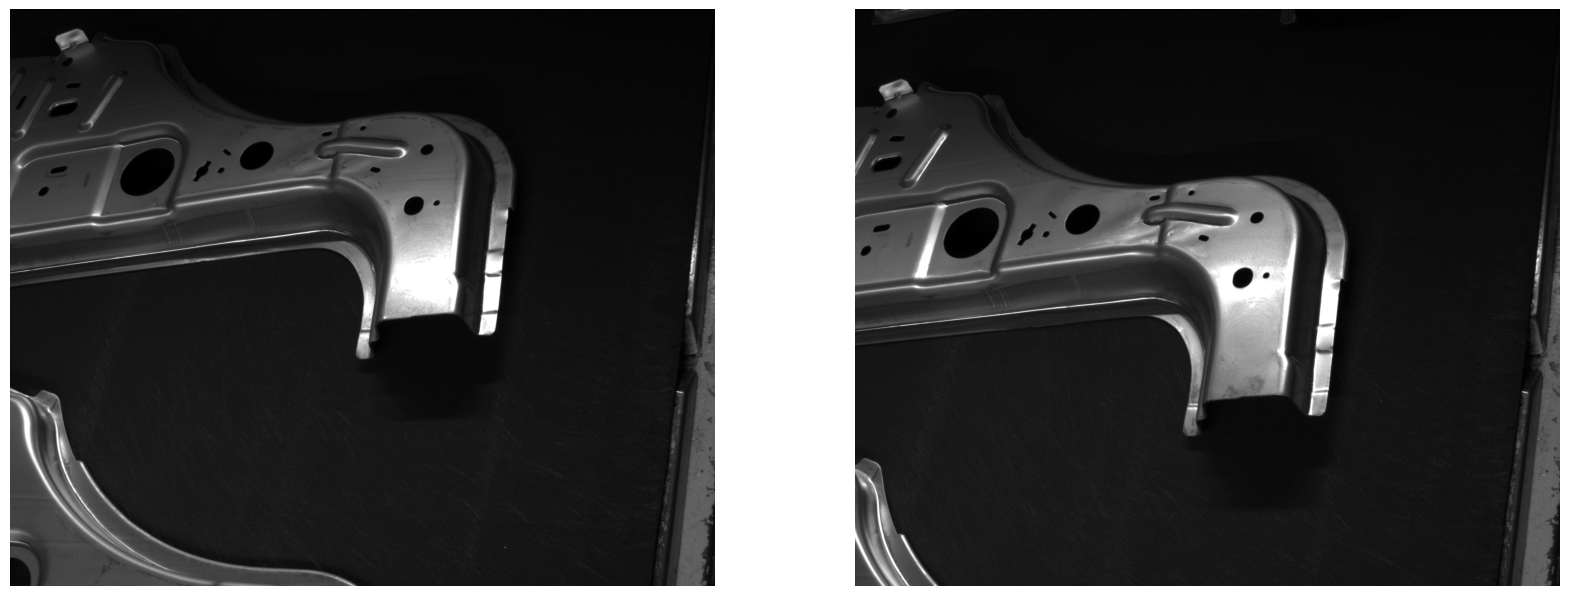

./stictching_out_0.jpg /home/emir/Desktop/dev/Inovako/dataset_no_detect/Emin_NoDetect/2/Basler_a2A2600-64umBAS__40359002__20230713_185743086_0005.tiff
img_1: ./stictching_out_0.jpg
img_2: /home/emir/Desktop/dev/Inovako/dataset_no_detect/Emin_NoDetect/2/Basler_a2A2600-64umBAS__40359002__20230713_185743086_0010.tiff


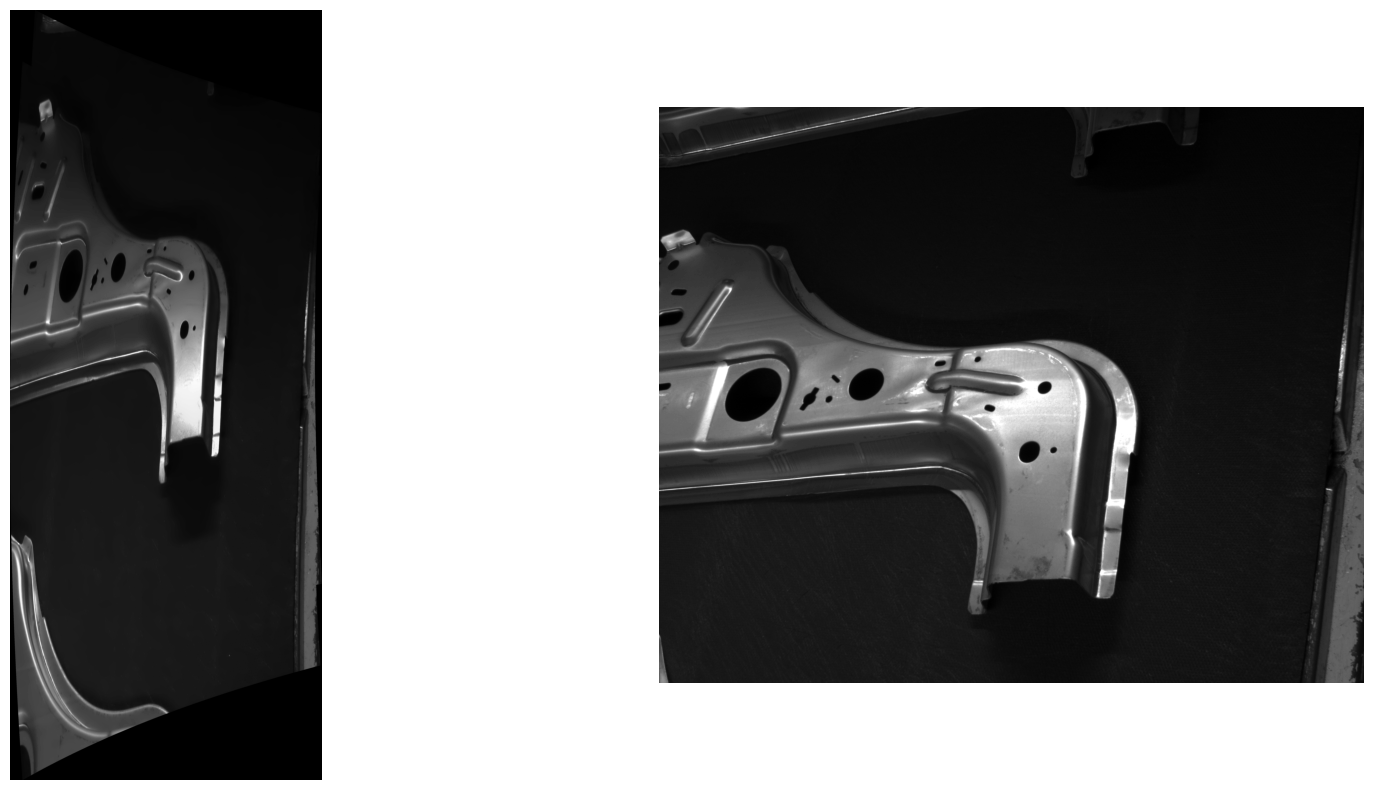

Error during stitching, status code = 1
./stictching_out_0.jpg /home/emir/Desktop/dev/Inovako/dataset_no_detect/Emin_NoDetect/2/Basler_a2A2600-64umBAS__40359002__20230713_185743086_0010.tiff
img_1: ./stictching_out_0.jpg
img_2: /home/emir/Desktop/dev/Inovako/dataset_no_detect/Emin_NoDetect/2/Basler_a2A2600-64umBAS__40359002__20230713_185743086_0015.tiff


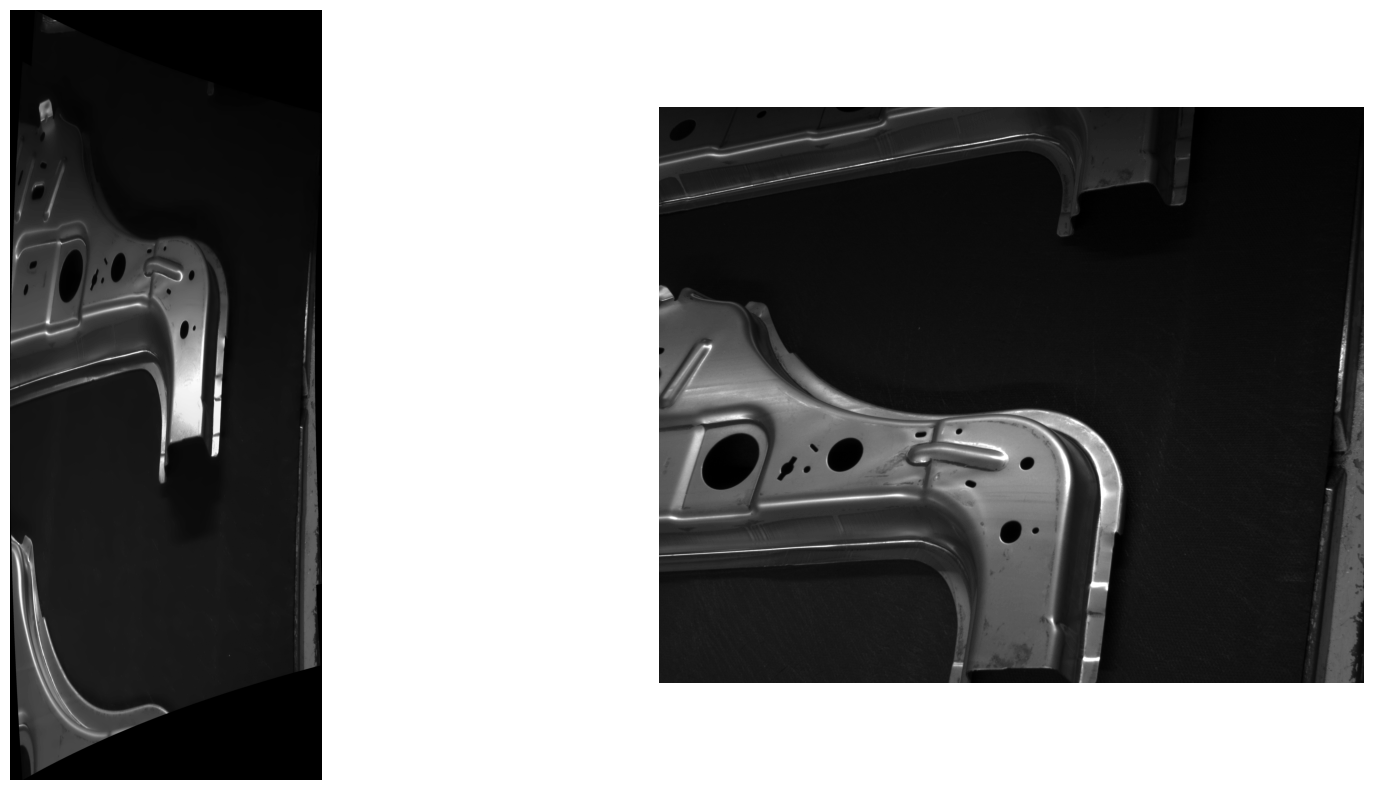

Error during stitching, status code = 1
./stictching_out_1.jpg /home/emir/Desktop/dev/Inovako/dataset_no_detect/Emin_NoDetect/2/Basler_a2A2600-64umBAS__40359002__20230713_185743086_0015.tiff
img_1: ./stictching_out_1.jpg
img_2: /home/emir/Desktop/dev/Inovako/dataset_no_detect/Emin_NoDetect/2/Basler_a2A2600-64umBAS__40359002__20230713_185743086_0020.tiff


[ WARN:0@846.377] global loadsave.cpp:248 findDecoder imread_('./stictching_out_1.jpg'): can't open/read file: check file path/integrity


error: OpenCV(4.8.0) /io/opencv/modules/imgproc/src/color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cvtColor'


In [22]:
# img_1 = os.path.join(dataset_dir, sorted(os.listdir(dataset_dir))[0])
# img_2 = os.path.join(dataset_dir, sorted(os.listdir(dataset_dir))[3])
# vertical_stitching(img_1=img_1, img_2=img_2, count=0)
img_1 = None
img_2 = None
count = 0
files = sorted(os.listdir(dataset_dir))

# Loop over files with step size 4
for i in range(0, len(files), 20):
    img_dir = os.path.join(dataset_dir, files[i])
    print(img_1, img_2)
    if img_1 is not None:
        img_2 = img_dir
        img_1 = vertical_stitching(img_1=img_1, img_2=img_2, count=count)
        count += 1
    if img_1 is None:
        img_1 = img_dir